In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load Dataset
df = pd.read_csv("data/housepricefeature.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Township                    2000 non-null   object 
 1   Area                        2000 non-null   object 
 2   State                       2000 non-null   object 
 3   Tenure                      2000 non-null   object 
 4   Type                        2000 non-null   object 
 5   Median_Price                2000 non-null   float64
 6   Median_PSF                  2000 non-null   float64
 7   Transactions                2000 non-null   int64  
 8   Price_per_Transaction       2000 non-null   float64
 9   HighDemand                  2000 non-null   int64  
 10  PriceTier                   2000 non-null   object 
 11  Freehold_Flag               2000 non-null   int64  
 12  Is_Central                  2000 non-null   int64  
 13  Log_Median_Price            2000 

In [6]:
print(df.describe(include='all').transpose())

                             count unique                      top  freq  \
Township                      2000   1946              TAMAN MAWAR     4   
Area                          2000    303                     Ipoh    67   
State                         2000     16                 Selangor   545   
Tenure                        2000      4                 Freehold  1318   
Type                          2000     46            Terrace House   956   
Median_Price                2000.0    NaN                      NaN   NaN   
Median_PSF                  2000.0    NaN                      NaN   NaN   
Transactions                2000.0    NaN                      NaN   NaN   
Price_per_Transaction       2000.0    NaN                      NaN   NaN   
HighDemand                  2000.0    NaN                      NaN   NaN   
PriceTier                     2000      3                      Low   670   
Freehold_Flag               2000.0    NaN                      NaN   NaN   
Is_Central  

In [7]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


C:\Users\Legion-User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


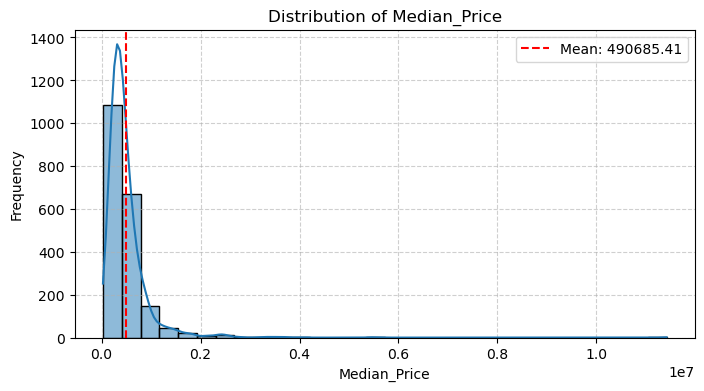

C:\Users\Legion-User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


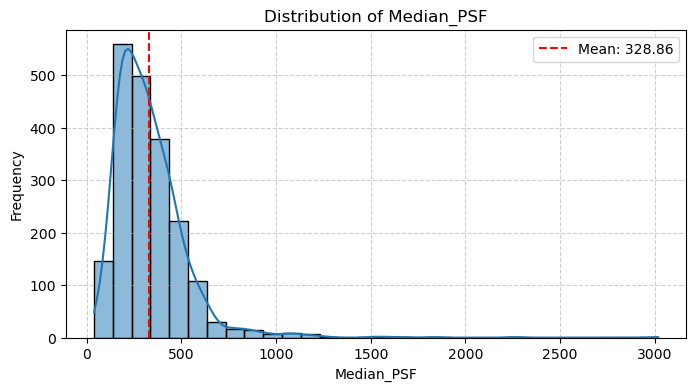

C:\Users\Legion-User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


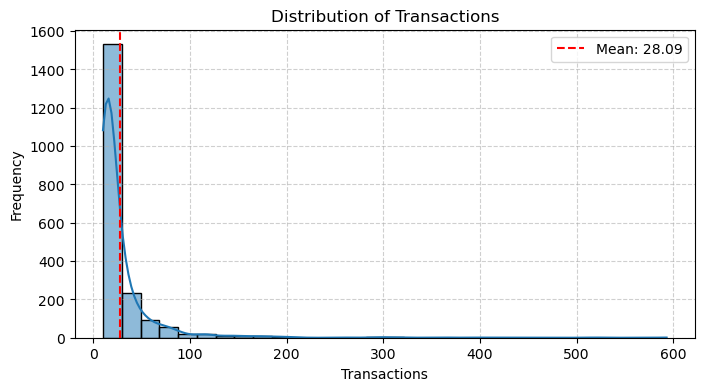

C:\Users\Legion-User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


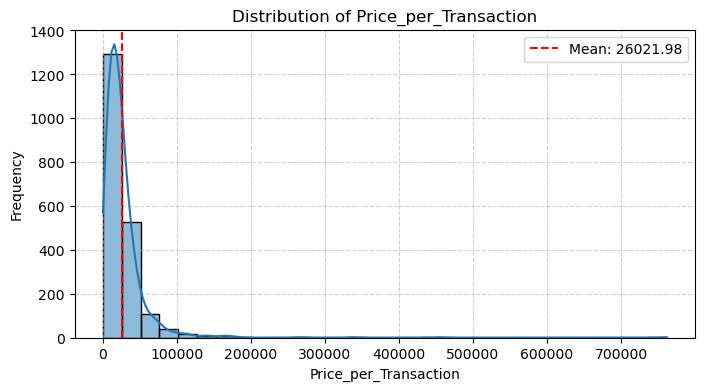

C:\Users\Legion-User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


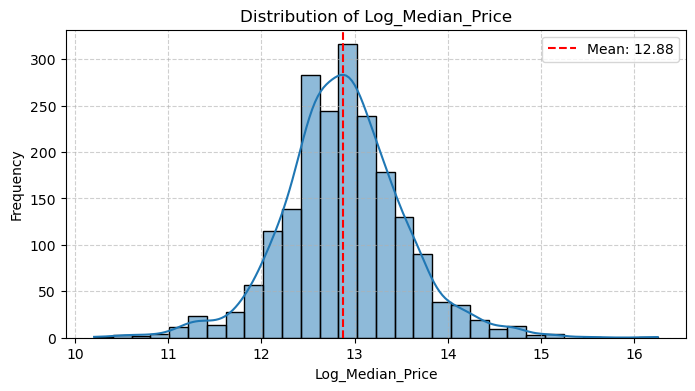

C:\Users\Legion-User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


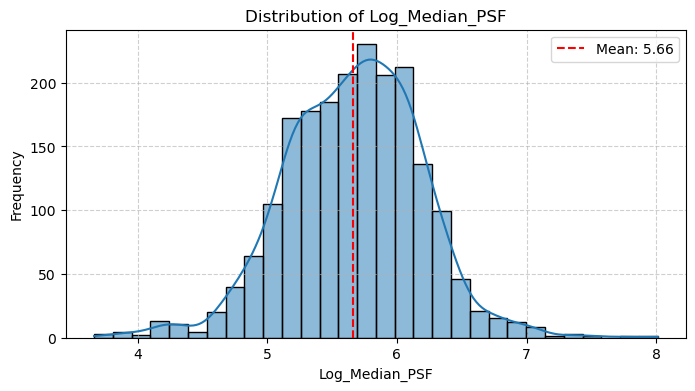

In [8]:
num_cols = [
    'Median_Price', 
    'Median_PSF', 
    'Transactions',
    'Price_per_Transaction',       # engineered
    'Log_Median_Price',            # engineered
    'Log_Median_PSF'               # engineered
]

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], bins=30, kde=True)
        plt.axvline(df[col].mean(), color='red', linestyle='--', label=f"Mean: {df[col].mean():.2f}")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.show()
    else:
        print(f"⚠️ Column '{col}' not found in dataframe")

✅ Numeric columns converted


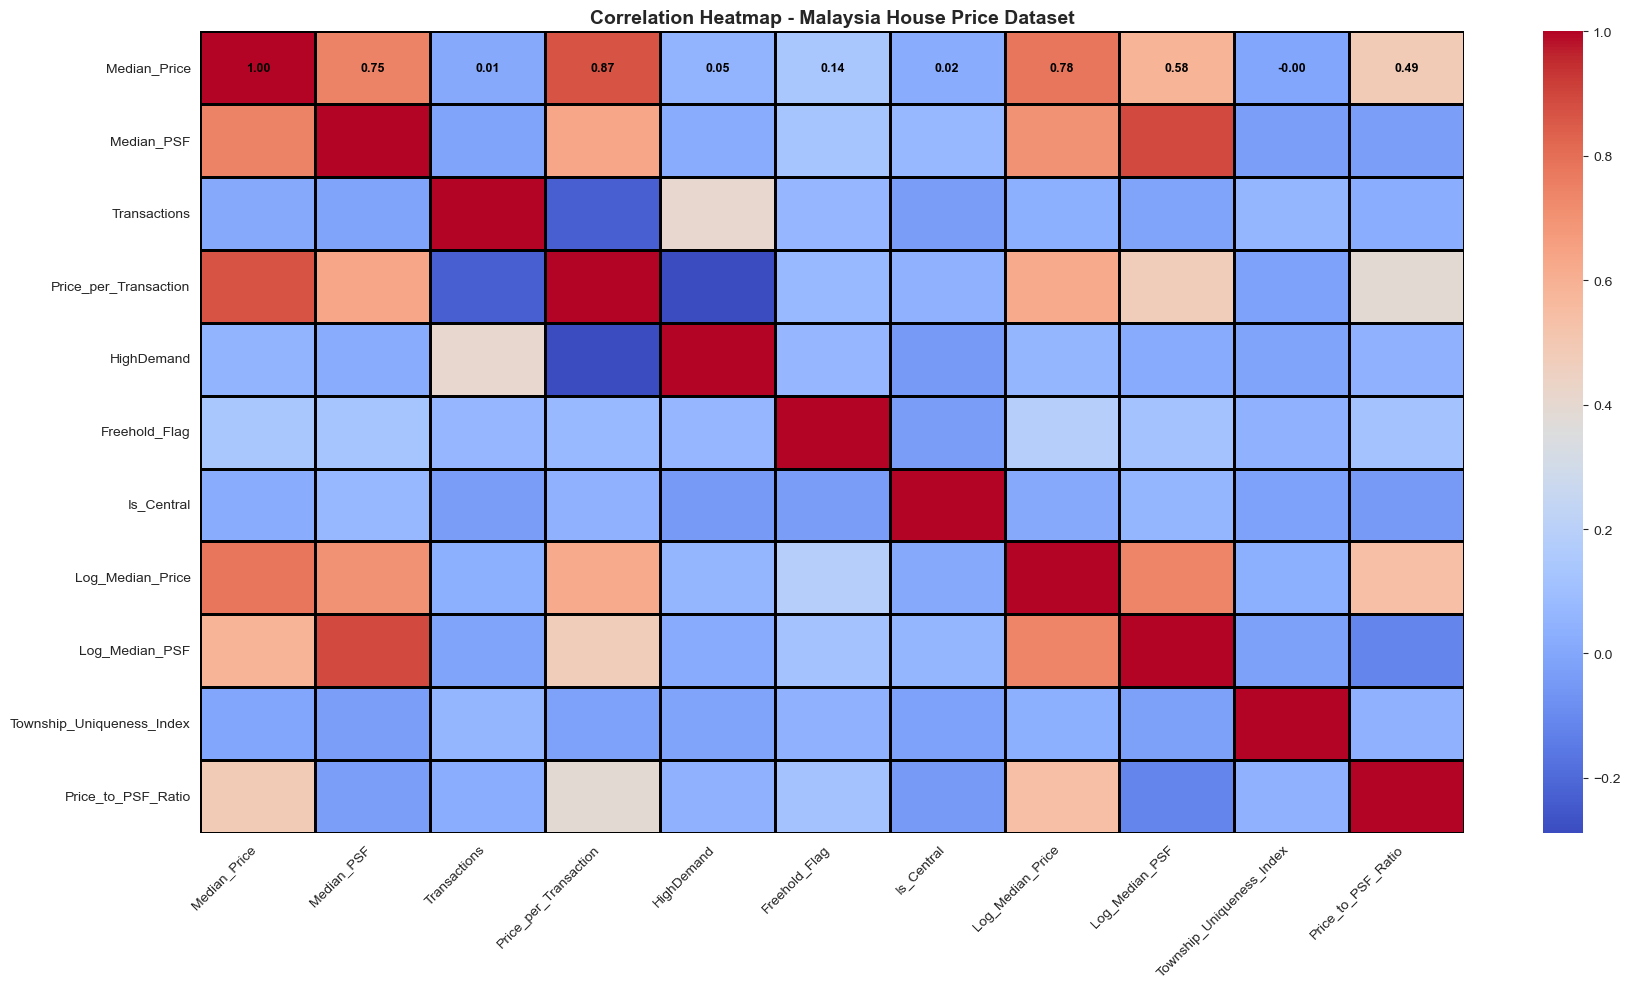

✅ Heatmap displayed successfully


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------------------
# FIX NUMERIC DATA TYPES
# ---------------------------

num_features = [
    'Median_Price','Median_PSF','Transactions',
    'Price_per_Transaction','Log_Median_Price','Log_Median_PSF'
]

for col in num_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("✅ Numeric columns converted")

# ---------------------------
# CORRELATION HEATMAP
# ---------------------------

# select only numeric columns
numeric_df = df.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()

plt.figure(figsize=(18,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.8,
    linecolor="black",
    annot_kws={"size": 9, "color": "black", "weight": "bold"}
)

plt.title("Correlation Heatmap - Malaysia House Price Dataset", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("✅ Heatmap displayed successfully")

✅ Feature-engineered dataset loaded: (2000, 22)

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Township                    2000 non-null   object 
 1   Area                        2000 non-null   object 
 2   State                       2000 non-null   object 
 3   Tenure                      2000 non-null   object 
 4   Type                        2000 non-null   object 
 5   Median_Price                2000 non-null   float64
 6   Median_PSF                  2000 non-null   float64
 7   Transactions                2000 non-null   int64  
 8   Price_per_Transaction       2000 non-null   float64
 9   HighDemand                  2000 non-null   int64  
 10  PriceTier                   2000 non-null   object 
 11  Freehold_Flag               2000 non-null   int64  
 12  Is_Central               

C:\Users\Legion-User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)
C:\Users\Legion-User\AppData\Local\Temp\ipykernel_39384\1238638322.py:111: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.tight_layout()
C:\Users\Legion-User\AppData\Local\Temp\ipykernel_39384\1238638322.py:114: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  plt.savefig('correlation_heatmap_feature_engineered.png', dpi=300, bbox_inches='tight')
C:\Users\Legion-User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


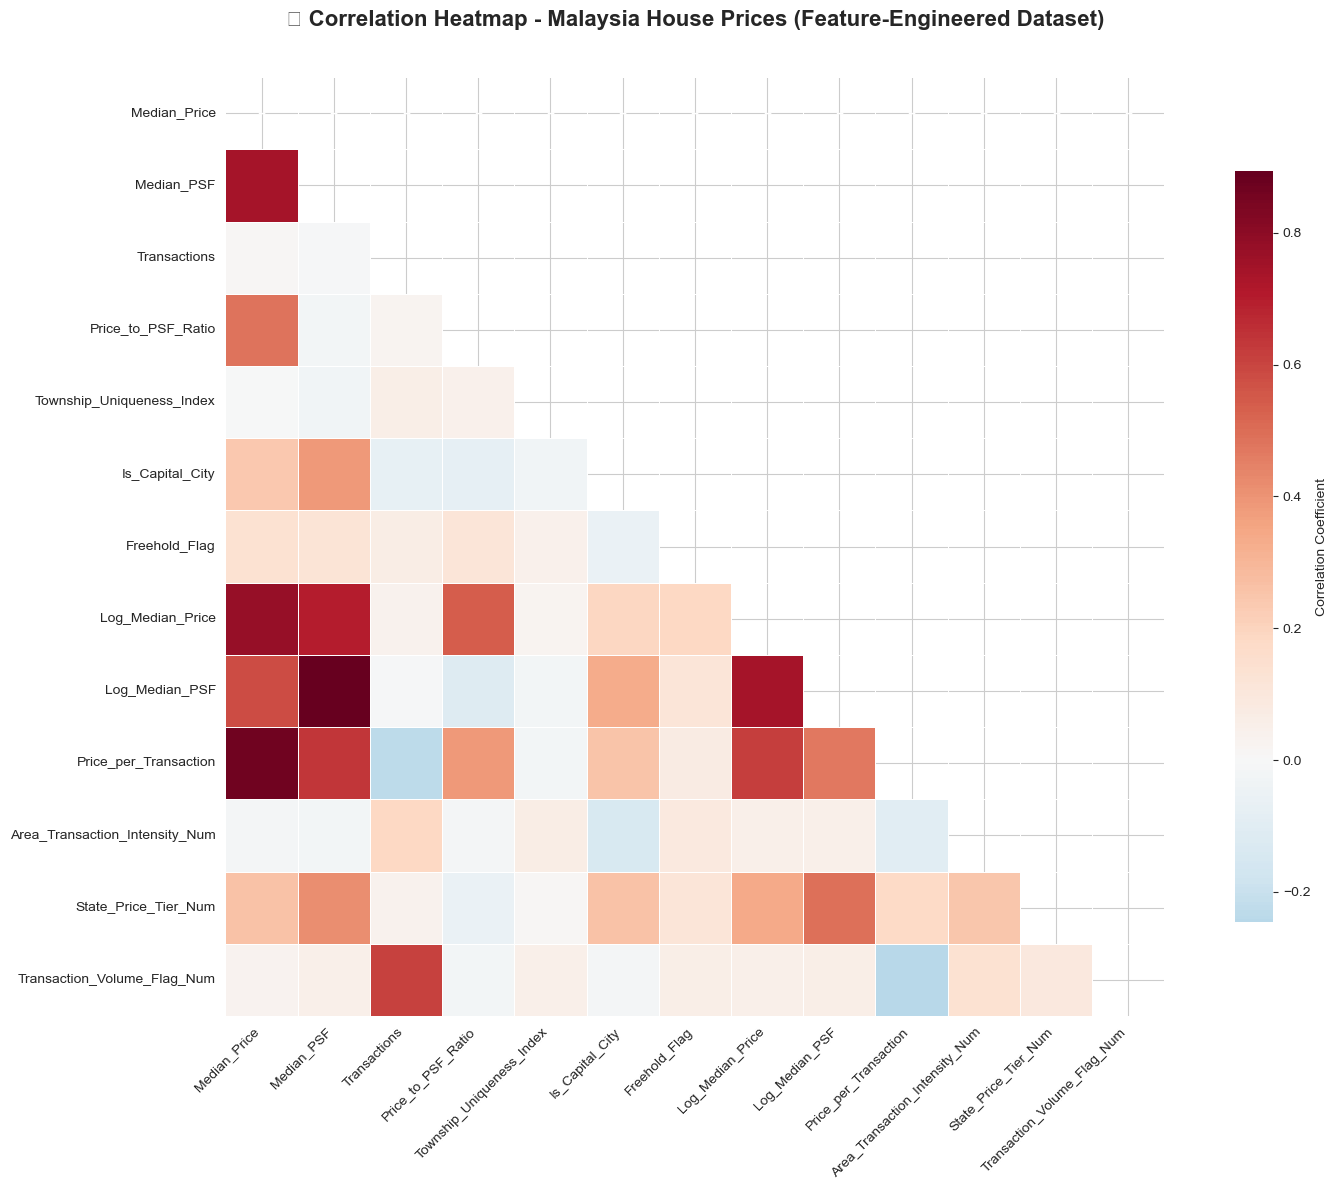

✅ Correlation heatmap created and saved as 'correlation_heatmap_feature_engineered.png'

🔍 KEY CORRELATION INSIGHTS

🎯 CORRELATION WITH MEDIAN_PRICE (Target Variable):
--------------------------------------------------
   ↑ Price_per_Transaction          :  0.867 (🟢 STRONG)
   ↑ Log_Median_Price               :  0.780 (🟢 STRONG)
   ↑ Median_PSF                     :  0.747 (🟢 STRONG)
   ↑ Log_Median_PSF                 :  0.583 (🟢 STRONG)
   ↑ Price_to_PSF_Ratio             :  0.485 (🟡 MODERATE)
   ↑ State_Price_Tier_Num           :  0.263 (🔴 WEAK)
   ↑ Is_Capital_City                :  0.240 (🔴 WEAK)
   ↑ Freehold_Flag                  :  0.138 (🔴 WEAK)
   ↑ Transaction_Volume_Flag_Num    :  0.034 (🔴 WEAK)
   ↑ Transactions                   :  0.009 (🔴 WEAK)
   ↓ Township_Uniqueness_Index      : -0.004 (🔴 WEAK)
   ↓ Area_Transaction_Intensity_Num : -0.017 (🔴 WEAK)

🔗 STRONG POSITIVE CORRELATIONS (> 0.7):
--------------------------------------------------
   Median_Price              

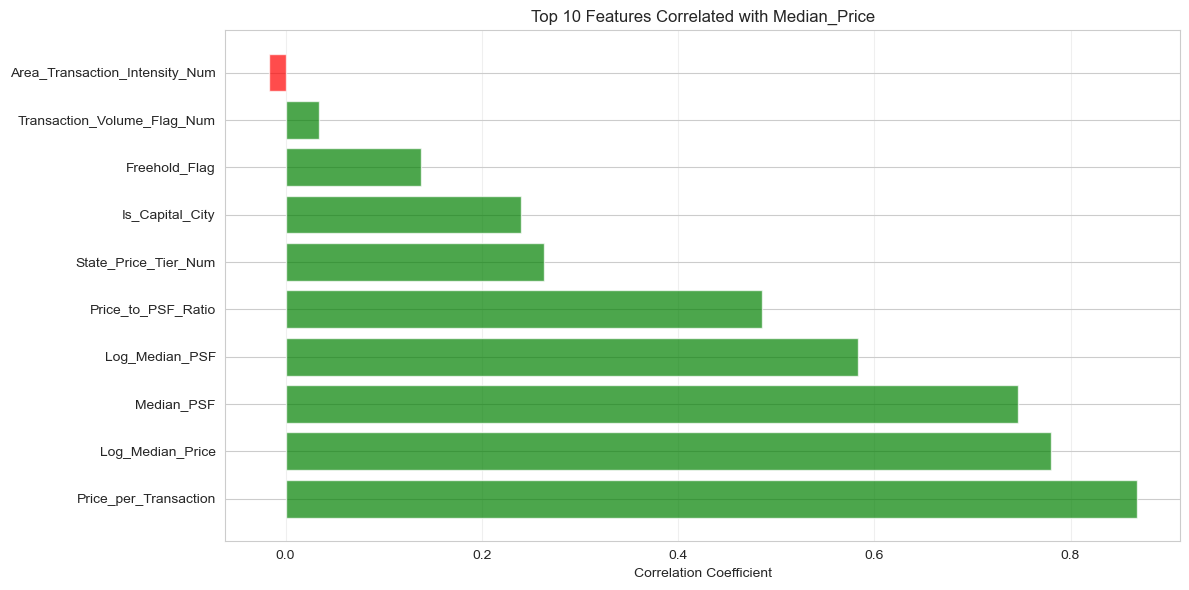


✅ Top correlations plot saved as 'top_correlations_with_price.png'

📈 CORRELATION ANALYSIS COMPLETED


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your feature-engineered dataset

print("✅ Feature-engineered dataset loaded:", df.shape)

# Display basic info
print("\n📊 Dataset Info:")
print(df.info())
print("\n📈 Dataset Description:")
print(df.describe(include='all').transpose())
print("\n🔍 Missing Values:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# ============================
# DATA PREPARATION FOR HEATMAP
# ============================

# Create additional features that might be missing
print("\n🛠️ Creating additional features for analysis...")

# Log transformations (if not already present)
if 'Log_Median_Price' not in df.columns:
    df['Log_Median_Price'] = np.log1p(df['Median_Price'])
if 'Log_Median_PSF' not in df.columns:
    df['Log_Median_PSF'] = np.log1p(df['Median_PSF'])
if 'Price_per_Transaction' not in df.columns:
    df['Price_per_Transaction'] = df['Median_Price'] / df['Transactions'].replace(0, 1)

# Freehold flag (useful for correlation)
df['Freehold_Flag'] = df['Tenure'].apply(lambda x: 1 if 'Freehold' in str(x) else 0)

# Convert categorical engineered features to numeric for correlation
# Area_Transaction_Intensity mapping
area_intensity_map = {'Low': 0, 'Medium': 1, 'High': 2}
if 'Area_Transaction_Intensity' in df.columns:
    df['Area_Transaction_Intensity_Num'] = df['Area_Transaction_Intensity'].map(area_intensity_map)

# State_Price_Tier mapping
state_tier_map = {'Tier 3: Low-Cost State': 0, 'Tier 2: Medium-Cost State': 1, 'Tier 1: High-Cost State': 2}
if 'State_Price_Tier' in df.columns:
    df['State_Price_Tier_Num'] = df['State_Price_Tier'].map(state_tier_map)

# Transaction_Volume_Flag mapping
volume_map = {'Low_Volume': 0, 'Medium_Volume': 1, 'High_Volume': 2}
if 'Transaction_Volume_Flag' in df.columns:
    df['Transaction_Volume_Flag_Num'] = df['Transaction_Volume_Flag'].map(volume_map)

# ============================
# CORRELATION HEATMAP
# ============================

# Select only numeric columns for correlation analysis
numeric_columns = [
    # Original numeric features
    'Median_Price', 'Median_PSF', 'Transactions',
    
    # Engineered numeric features
    'Price_to_PSF_Ratio', 'Township_Uniqueness_Index', 'Is_Capital_City', 'Freehold_Flag',
    
    # Additional created features
    'Log_Median_Price', 'Log_Median_PSF', 'Price_per_Transaction',
    
    # Mapped categorical features
    'Area_Transaction_Intensity_Num', 'State_Price_Tier_Num', 'Transaction_Volume_Flag_Num'
]

# Filter only columns that exist in the dataframe
available_numeric_cols = [col for col in numeric_columns if col in df.columns]
numeric_df = df[available_numeric_cols].select_dtypes(include=[np.number])

print(f"\n📋 Columns used for correlation analysis ({len(numeric_df.columns)}):")
for col in numeric_df.columns:
    print(f"   - {col}")

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

print(f"\n📐 Correlation matrix shape: {corr_matrix.shape}")

# ============================
# VISUALIZATION
# ============================

plt.figure(figsize=(16, 12))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    annot_kws={"size": 9, "weight": "bold"}
)

plt.title("🏠 Correlation Heatmap - Malaysia House Prices (Feature-Engineered Dataset)\n", 
          fontsize=16, fontweight="bold", pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Save the heatmap
plt.savefig('correlation_heatmap_feature_engineered.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Correlation heatmap created and saved as 'correlation_heatmap_feature_engineered.png'")

# ============================
# CORRELATION INSIGHTS
# ============================

print("\n" + "="*70)
print("🔍 KEY CORRELATION INSIGHTS")
print("="*70)

# 1. Correlation with Median_Price (Target Variable)
if 'Median_Price' in corr_matrix.columns:
    price_correlations = corr_matrix['Median_Price'].sort_values(ascending=False)
    
    print("\n🎯 CORRELATION WITH MEDIAN_PRICE (Target Variable):")
    print("-" * 50)
    for feature, corr_value in price_correlations.items():
        if feature != 'Median_Price':
            strength = "🟢 STRONG" if abs(corr_value) > 0.5 else "🟡 MODERATE" if abs(corr_value) > 0.3 else "🔴 WEAK"
            direction = "↑" if corr_value > 0 else "↓"
            print(f"   {direction} {feature:30} : {corr_value:6.3f} ({strength})")

# 2. Strong Positive Correlations
strong_positive = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1.0)].stack().reset_index()
strong_positive.columns = ['Feature1', 'Feature2', 'Correlation']
strong_positive = strong_positive[strong_positive['Feature1'] != strong_positive['Feature2']]

if not strong_positive.empty:
    print(f"\n🔗 STRONG POSITIVE CORRELATIONS (> 0.7):")
    print("-" * 50)
    for _, row in strong_positive.iterrows():
        print(f"   {row['Feature1']:25} ↔ {row['Feature2']:25} : {row['Correlation']:.3f}")

# 3. Strong Negative Correlations
strong_negative = corr_matrix[corr_matrix < -0.5].stack().reset_index()
strong_negative.columns = ['Feature1', 'Feature2', 'Correlation']
strong_negative = strong_negative[strong_negative['Feature1'] != strong_negative['Feature2']]

if not strong_negative.empty:
    print(f"\n🔻 STRONG NEGATIVE CORRELATIONS (< -0.5):")
    print("-" * 50)
    for _, row in strong_negative.iterrows():
        print(f"   {row['Feature1']:25} ↔ {row['Feature2']:25} : {row['Correlation']:.3f}")

# 4. Feature Engineering Effectiveness
print(f"\n📊 FEATURE ENGINEERING EFFECTIVENESS:")
print("-" * 50)
engineered_features = ['Price_to_PSF_Ratio', 'Township_Uniqueness_Index', 'Is_Capital_City', 
                       'Area_Transaction_Intensity_Num', 'State_Price_Tier_Num', 'Transaction_Volume_Flag_Num']

for feature in engineered_features:
    if feature in corr_matrix.columns and 'Median_Price' in corr_matrix.columns:
        corr_with_price = corr_matrix.loc[feature, 'Median_Price']
        print(f"   {feature:35} : {corr_with_price:6.3f} with Median_Price")

# ============================
# ADDITIONAL VISUALIZATION - TOP CORRELATIONS
# ============================

# Plot top correlations with Median_Price
if 'Median_Price' in corr_matrix.columns:
    # Get top 10 features correlated with Median_Price (excluding itself)
    top_correlations = corr_matrix['Median_Price'].drop('Median_Price').sort_values(key=abs, ascending=False).head(10)
    
    plt.figure(figsize=(12, 6))
    colors = ['green' if x > 0 else 'red' for x in top_correlations.values]
    
    plt.barh(range(len(top_correlations)), top_correlations.values, color=colors, alpha=0.7)
    plt.yticks(range(len(top_correlations)), top_correlations.index)
    plt.xlabel('Correlation Coefficient')
    plt.title('Top 10 Features Correlated with Median_Price')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('top_correlations_with_price.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n✅ Top correlations plot saved as 'top_correlations_with_price.png'")

print("\n" + "="*70)
print("📈 CORRELATION ANALYSIS COMPLETED")
print("="*70)

✅ Dataset Loaded: (2000, 22)
✅ Numeric data types ensured
✅ Correlation matrix created with shape: (12, 12)


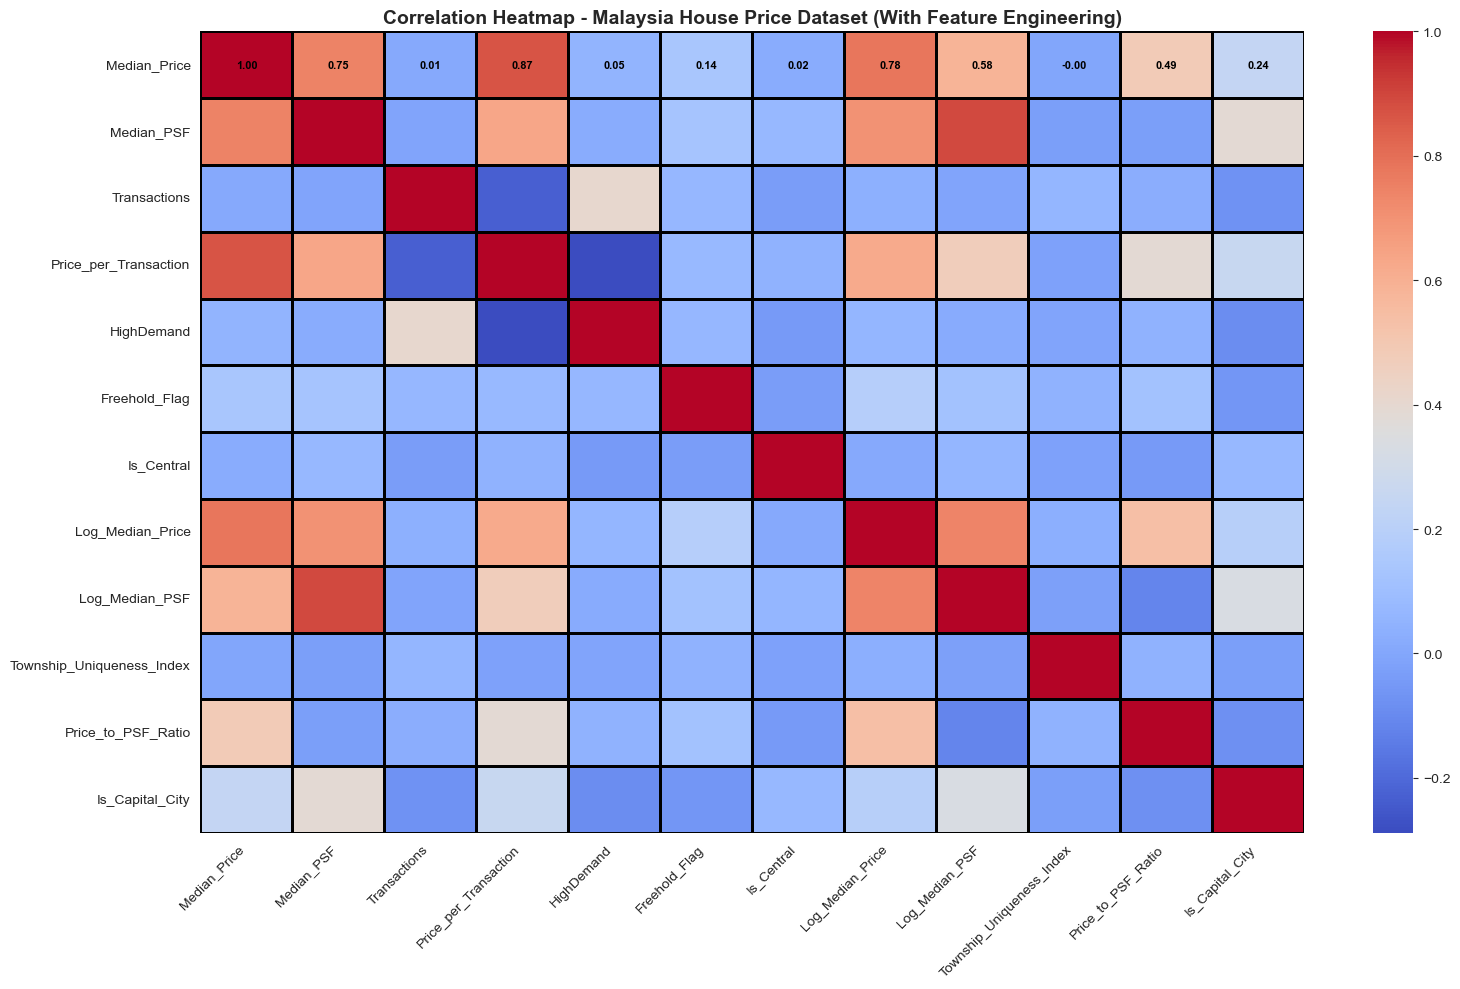

✅ Heatmap displayed successfully


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# 1️⃣ Load the Feature Engineered Dataset
# ===============================
df = pd.read_csv("data/housepricefeature.csv")
print("✅ Dataset Loaded:", df.shape)

# ===============================
# 2️⃣ Convert Numeric Columns to Correct Type
# ===============================
# Select columns that can be numeric
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Some engineered columns might be object but numeric-looking — convert them too
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='ignore')

print("✅ Numeric data types ensured")

# ===============================
# 3️⃣ Compute Correlation Matrix
# ===============================
numeric_df = df.select_dtypes(include=['int64','float64'])
corr = numeric_df.corr()

print("✅ Correlation matrix created with shape:", corr.shape)

# ===============================
# 4️⃣ Plot the Correlation Heatmap
# ===============================
plt.figure(figsize=(16,10))
plt.rcParams['figure.dpi'] = 150

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.8,
    linecolor="black",
    annot_kws={"size": 8, "color": "black", "weight": "bold"}
)

plt.title("Correlation Heatmap - Malaysia House Price Dataset (With Feature Engineering)", 
          fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("✅ Heatmap displayed successfully")